<a href="https://colab.research.google.com/github/ScarlettQiu/OCR_for_Bank_Statement/blob/main/OpenCV_PyTesseract_cc1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#need to install pytersseract before importing it
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (7,194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [2]:
pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.5 MB/s eta 0:00:00


In [3]:
#git clone the image dataset from GitHub
url = 'https://github.com/ScarlettQiu/OCR_for_Bank_Statement/tree/dc3b2388bc59637feef5cfafa6b146f6511cc3b4/Dataset'
!git clone https://github.com/ScarlettQiu/OCR_for_Bank_Statement.git 

Cloning into 'OCR_for_Bank_Statement'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 94 (delta 31), reused 27 (delta 2), pack-reused 0
Unpacking objects: 100% (94/94), 12.31 MiB | 5.46 MiB/s, done.


In [4]:
import cv2
import glob
import numpy as np
import pandas as pd
import pytesseract
from pprint import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[14, 8]

import warnings
warnings.filterwarnings('ignore')

In [5]:
#define file path
filename = 'OCR_for_Bank_Statement/Dataset2/cc1.png'

#convert image to string
image = cv2.imread(filename)

# Re-scale the image before passing it to tesseract and do
scale_factor = 12

In [6]:
#Image Processing

def image_scale(image, scale_factor):
  # Re-scale the image before passing it to tesseract and do
  img = cv2.resize(image, (0,0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
  return img

img = image_scale(image, scale_factor)
  

In [7]:
# Preprocessing the image starts
 
# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
 
# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))
 
# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 2)
 
# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
                                                 cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True) 
# Creating a copy of image
im2 = img.copy()

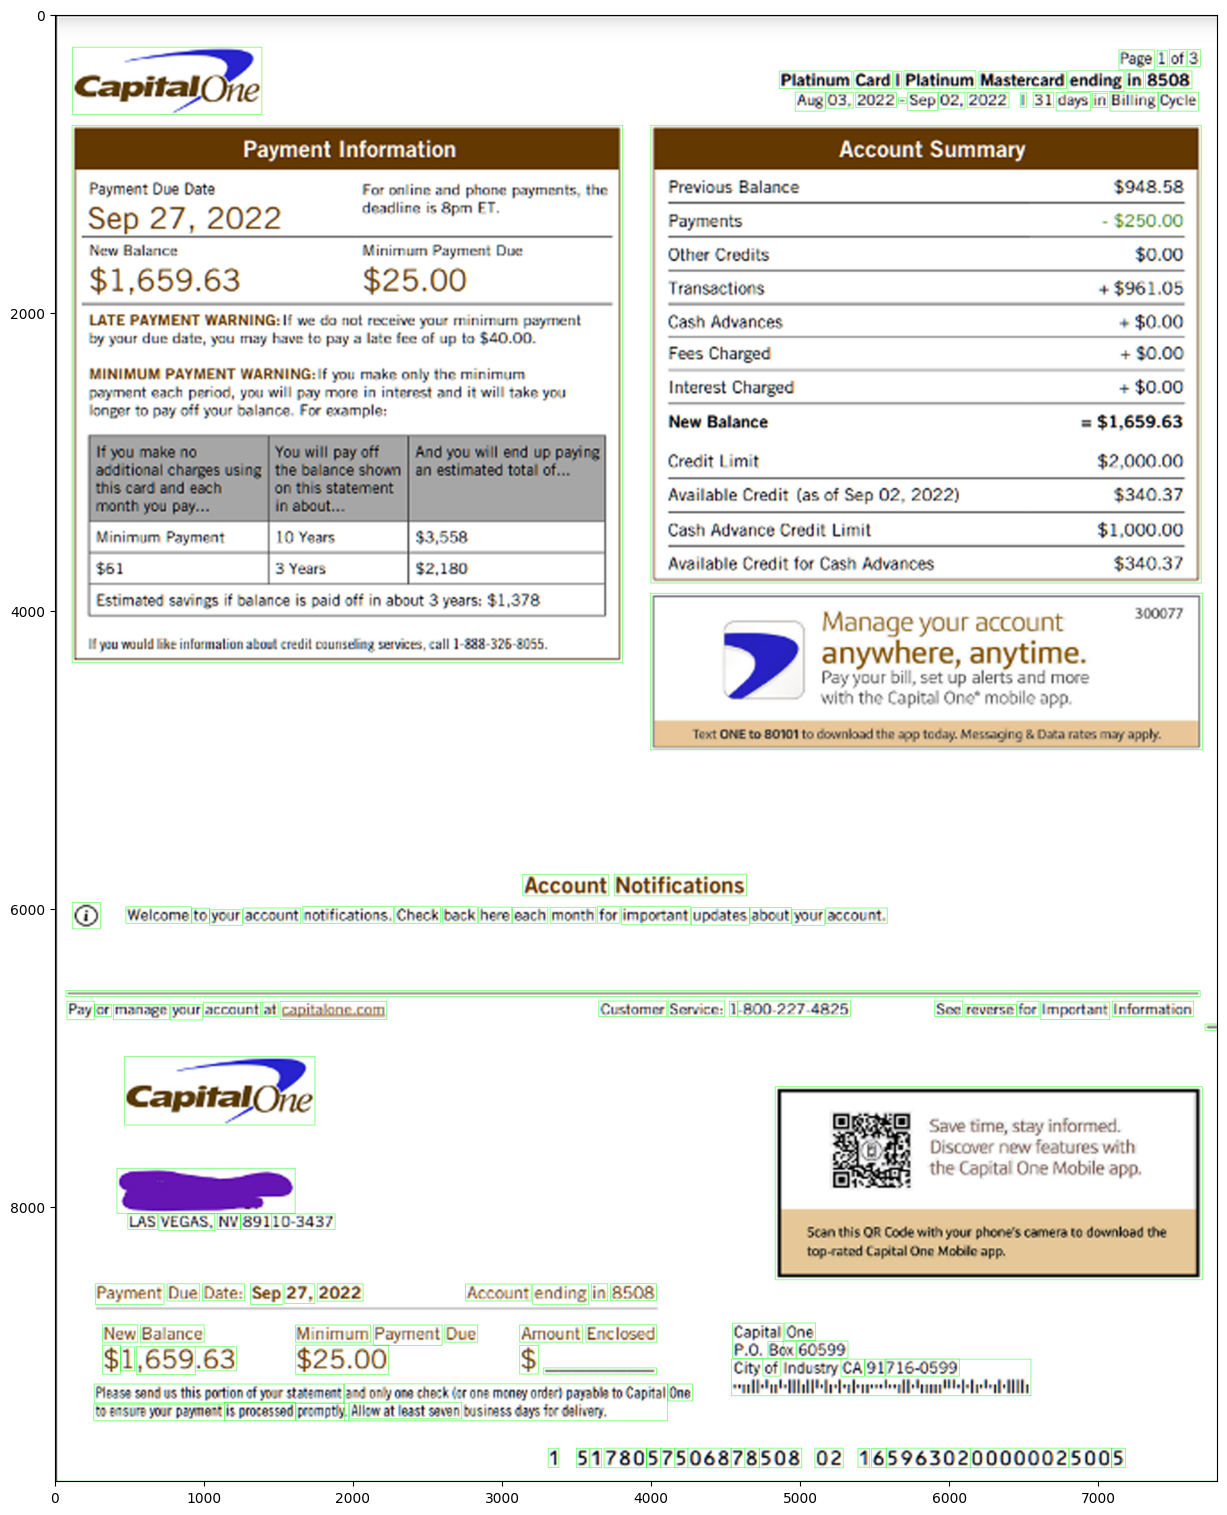

In [8]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
fig, ax = plt.subplots(figsize=(15,20))
plt.imshow(im2)
plt.show()

In [9]:
for n,cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
     
    # Drawing a rectangle on copied image
    rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
     
    # Cropping the text block for giving input to OCR
    cropped = im2[y:y + h, x:x + w]
     
    # Open the file in append mode
    #file = open("recognized.txt", "a")
     
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
     
    # Appending the text into file
    #file.write(text)
    #file.write("\n")
     
    # Close the file
    #if n == 4:
    print(f'(Conrours {n}:' + text)

(Conrours 0: 

 

Viole heater alee

Payment Due Date For online and phone payments, the

Sep 2/, 2O?7? deadline is 8pm FT

New Balarice Minirnum Payment Due

$1,659.63 $25.00

LATE PAYMENT WARNING: If we do not recerve your minirnurn payrnent
oy your due date, you may have to pay a late fee of up to $40.00.

MINIMUM PAYMENT WARNING: !f you make only the minimum
payment each period, you will pay more in interest and it will take you
lonper to pay off your dDalance. For example:

If you make no You will pay off And you will end up paying
additional charges using | the belance shown | an estimated total of...
this card and each on this statement

month you pay... in about...

Minimum Payment 10 Years

$61 3 Years

Estimated savings if balance is paid off in about 3 years: $1,378

t you would bke information aboet credil counseleg services, call 1-888-326-8055.

 

 

 

(Conrours 1: 

 

Account Summary

Previous Balance

Payments

Other Credits

Transactions

Cash Advances

Fees Charge

In [22]:
ground_value = '''Page|lof3|
Platinum Card | Platinum Mastercard ending in 8508
Billing|Cycle

[Aug|O3,|2022|-|Sep|02,2022|  | |31|days|

Account Summary

Payment Information

Previous Balance
Payments
Other Credits

Transactions

Payment Due Date

sep 27, 2022

New Balance Minimum Payment Due

$1,659.63 $25.00

LATE PAYMENT WARNING: If we do not receive your minimum payment
by your due date, you may have to pay a late fee of up to $40.00.

For online and phone payments, the
deadline is 8pm ET.

Cash Advances
Fees Charged
Interest Charged
New Balance

MINIMUM PAYMENT WARNING:!f you make only the minimum
payment each period, you will pay more in interest and it will take you
longer to pay off your balance. For example:

Credit Limit

Available Credit (as of Sep 02, 2022)

Cash Advance Credit Limit

Available Credit tor Cash Advances

Estimated savings if Dalance is paid off in about 3 years: $1,378

Manage your account
if you would like information about credil counseling services, call 1-888-326-8055.

$948.58

- $250.00
$0.00

+ $961.05
+ $0.00

+ $0.00

+ $0.00

= $1,659.63
$2,000.00
$340.37
$1,000.00
$340.37

anywhere, anytime.

Pay your bill, set up alerts and more

with the Capital One* mobile app.

Notifications
Welcome|to your|account|notifications,|Check||back|here|each|month| for |important|updates |about|your|account,

Pay|or|manage |your account|at|capitalone.com|

cans

 

Discover new features with

LAS|VEGAS, |NV/891/10-3437

   
 

 

     

 
  

  

Sep|27,|2022 Account|ending|in|8508
$25.00 City of| industry CA[91

and only one check (or one money order) payable to Capital One ta DAL ete dea dene eed tana eda aba
to ensure your payment |is processed|promptly, Allow at least seven|business days for delivery.

the Capital One Mobile app.

 

1 5/1/780/5/7/5/068/7/8)/508 165963020000002)/500/5

cc
'''

In [23]:
from Levenshtein import distance

text = '''Page|[Llof[3|
SOS Dee On IDOE ME lldsatmetnsiOn
Billing|Cycle

[Aug|O3,|2022|-|Sep|02,/2022| [| |31|days|

Account Summary

me iote lies laies

Previous Balance
Payments
Other Credits

Transactions

Payment Due Date

sep 27, 2022

New Balance Minimum Payment Due

$1,659.63 $25.00

LATE PAYMENT WARNING: If we do not recerve your rminirnurn peyrnent
by your due date, you may have to pay a late fee of up to $40.00.

For online and phone payments, the
deadline is 8pm ET.

Cash Advances
Fees Charged
Interest Charged
New Balance

MINIMUM PAYMENT WARNING:!f you make only the minimum
payment each period, you will pay more in interest and it will take you
longer to pay off your balance. For example:

Credit Limit

Available Credit (as of Sep O02, 2022)

Cash Advance Credit Limit

Available Credit tor Cash Advances

Estimated savings if Dalance is paid off in about 3 years: $1,378

Manage your account
if you would bke information abost credil counselmg services, call 1-888-326-8055.

$948.58

- $250.00
$0.00

+ $961.05
+ $0.00

+ $0.00

+ $0.00

= $1,659.63
$2,000.00
$340.37
$1,000.00
$340.37

anywhere, anytime.

Pay your bill, set up alerts and more

with the Capital One* mobile app.

Notifications
Welcome|tolyour|account|notifications,|Check||back|here|each|month| for |important|updates |about|your|account,

Pay|or|manage |your/account|at)|capitalone.com|

cans

 

Discover new features vath

LAS|VEGAS, |NV/891/10-3437

   
 

 

     

 
  

  

Sep|27,|2022 Account|ending|in|&S08
$25.00 Citylof| industry CA[91

aed only one check (er one meney order) payable to Capital ean ta DAL ete dea dene eed tana eda aba
to ensure your payment |is processed|pecmptiy, Allow at least saven|tusinass days for delivery.

the Capital One Mabile app.

 

1 5/1/780/5/7/5/068/7/8)/508 165963020000002)/500/5

cc
'''


print(distance(ground_value, text))

99


In [24]:
from difflib import SequenceMatcher

sm = SequenceMatcher(None, text, ground_value)
true_positive_char_num = 0
for tag, i1, i2, j1, j2 in sm.get_opcodes():
    if tag== 'equal':
        true_positive_char_num += (j2 - j1)
    else:
        pass

print(f'accuracy = {true_positive_char_num/len(ground_value)}')

accuracy = 0.9052573932092004
